In [1]:
import pandas as pd
import string
import numpy as np
from sklearn.model_selection import train_test_split
import nltk
import re
import csv
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import sklearn
import codecs
import pymorphy2
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
%matplotlib inline 
sns.set(style="ticks")

In [2]:
data = pd.read_csv("./train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
from sklearn.model_selection import train_test_split

# data = data.drop(columns=["Id"])
del data['Id']

y = data["SalePrice"]
X = data.drop(columns=["SalePrice"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

C:\Users\kashu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

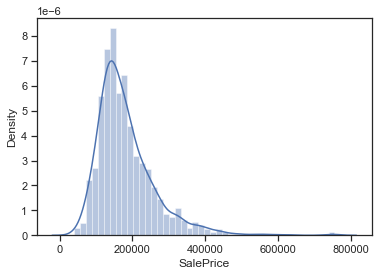

In [5]:
sns.distplot(y_train)

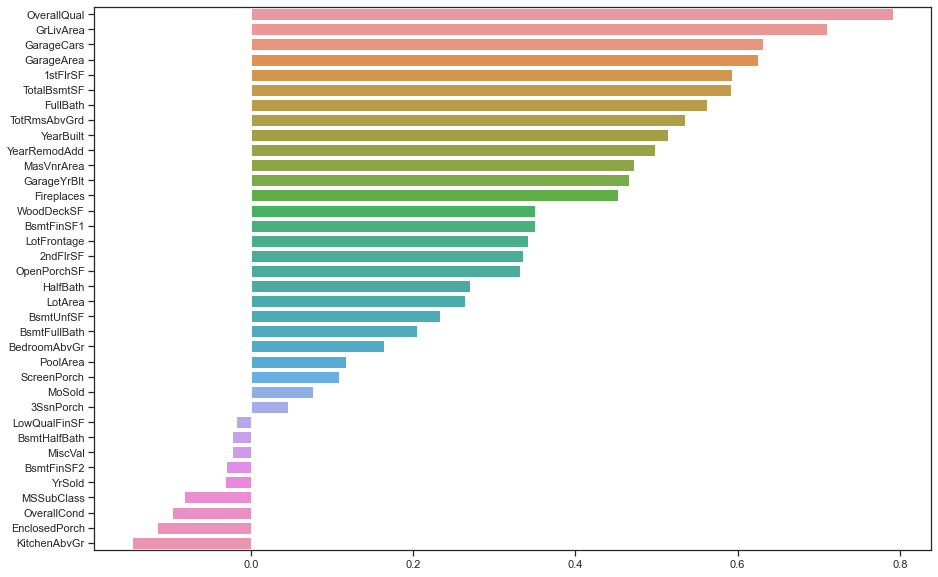

In [6]:
numeric_data = X_train.select_dtypes([np.number])

numeric_data_mean = numeric_data.mean()
numeric_features = numeric_data.columns

X_train = X_train.fillna(numeric_data_mean)
X_test = X_test.fillna(numeric_data_mean)

correlations = X_train[numeric_features].corrwith(y_train).sort_values(ascending=False)


plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(15, 10)

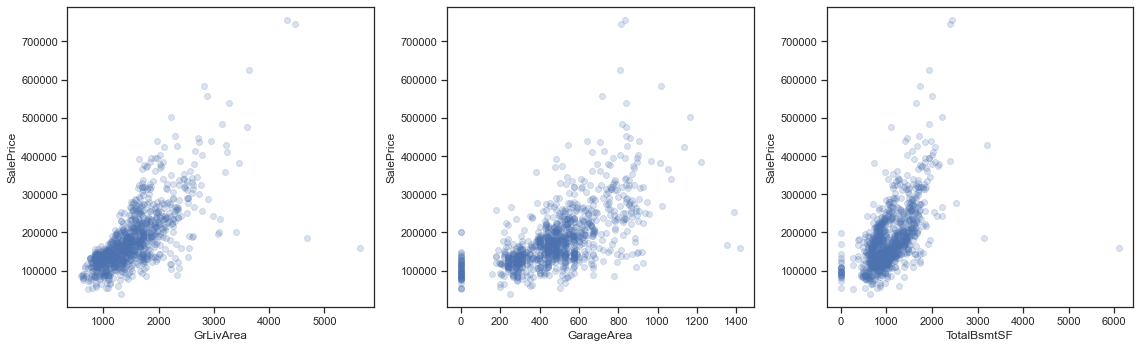

In [7]:
fig, axs = plt.subplots(figsize=(16, 5), ncols=3)
for i, feature in enumerate(["GrLivArea", "GarageArea", "TotalBsmtSF"]):
    axs[i].scatter(X_train[feature], y_train, alpha=0.2)
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("SalePrice")
plt.tight_layout()

In [8]:
data.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [9]:
data.LotFrontage.head()      

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64

In [10]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error

model = Ridge()
model.fit(X_train[numeric_features], y_train)
y_pred = model.predict(X_test[numeric_features])
y_train_pred = model.predict(X_train[numeric_features])

print("Test MAE = %.4f" % mean_absolute_error(y_test, y_pred))
print("Train MAE = %.4f" % mean_absolute_error(y_train, y_train_pred))

Test MAE = 23115.5140
Train MAE = 21403.8477


In [11]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train[numeric_features], y_train, cv=10, scoring="neg_mean_absolute_error")
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scores))
print("Mean CV MAE = %.4f" % np.mean(-cv_scores))

Cross validation scores:
	 -23300.6071
	-25210.1339
	-23025.1377
	-25031.0888
	-24134.6262
	-17875.8892
	-21254.5331
	-26403.8845
	-22160.8782
	-21016.7669
Mean CV MAE = 22941.3545


In [12]:
best_constant = y_train.mean()
print("Test MAE with constant = %.4f" % mean_absolute_error(y_test, best_constant * np.ones(y_test.shape)))
print("Train MAE with constant = %.4f" % mean_absolute_error(y_train, best_constant * np.ones(y_train.shape)))

Test MAE with constant = 57311.3914
Train MAE with constant = 57888.8833


In [13]:
 model.coef_

array([-1.89920225e+02, -1.24063295e+02,  4.18725460e-01,  1.84792459e+04,
        4.87776223e+03,  3.10090452e+02,  1.20405639e+02,  3.10211456e+01,
        7.78384677e+00, -6.20805604e+00,  2.08771401e-01,  1.78460177e+00,
        2.01339551e+01,  2.10727604e+01, -8.30120378e+00,  3.29055418e+01,
        1.07781944e+04,  5.45963533e+03,  3.85068415e+03, -5.62211567e+03,
       -8.76523417e+03, -1.29650454e+04,  4.63665635e+03,  3.03203744e+03,
        9.56510378e+01,  1.33460450e+04, -1.02344413e+01,  3.61103941e+01,
       -6.68775914e-01,  1.31699899e+01,  3.85382585e+01,  6.09257164e+01,
       -1.11602188e+01, -2.03865063e-01,  1.58407875e+02, -8.30165738e+02])

In [14]:
def show_weights(features, weights, scales):
    fig, axs = plt.subplots(figsize=(14, 10), ncols=2)
    sorted_weights = sorted(zip(weights, features, scales), reverse=True)
    weights = [x[0] for x in sorted_weights]
    features = [x[1] for x in sorted_weights]
    scales = [x[2] for x in sorted_weights]
    sns.barplot(y=features, x=weights, ax=axs[0])
    axs[0].set_xlabel("Weight")
    sns.barplot(y=features, x=scales, ax=axs[1])
    axs[1].set_xlabel("Scale")
    plt.tight_layout()

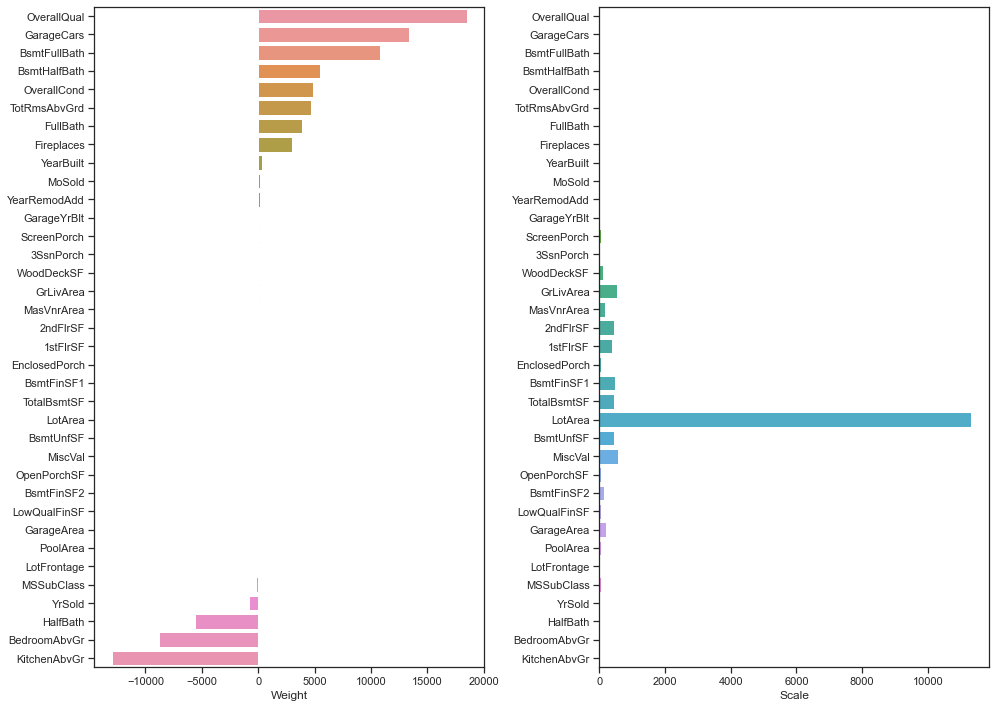

In [15]:
show_weights(numeric_features, model.coef_, X_train[numeric_features].std())

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_features])
X_test_scaled = scaler.transform(X_test[numeric_features])

model = Ridge()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

print("Test MAE = %.4f" % mean_absolute_error(y_test, y_pred))
print("Train MAE = %.4f" % mean_absolute_error(y_train, y_train_pred))

Test MAE = 23115.1497
Train MAE = 21405.0062


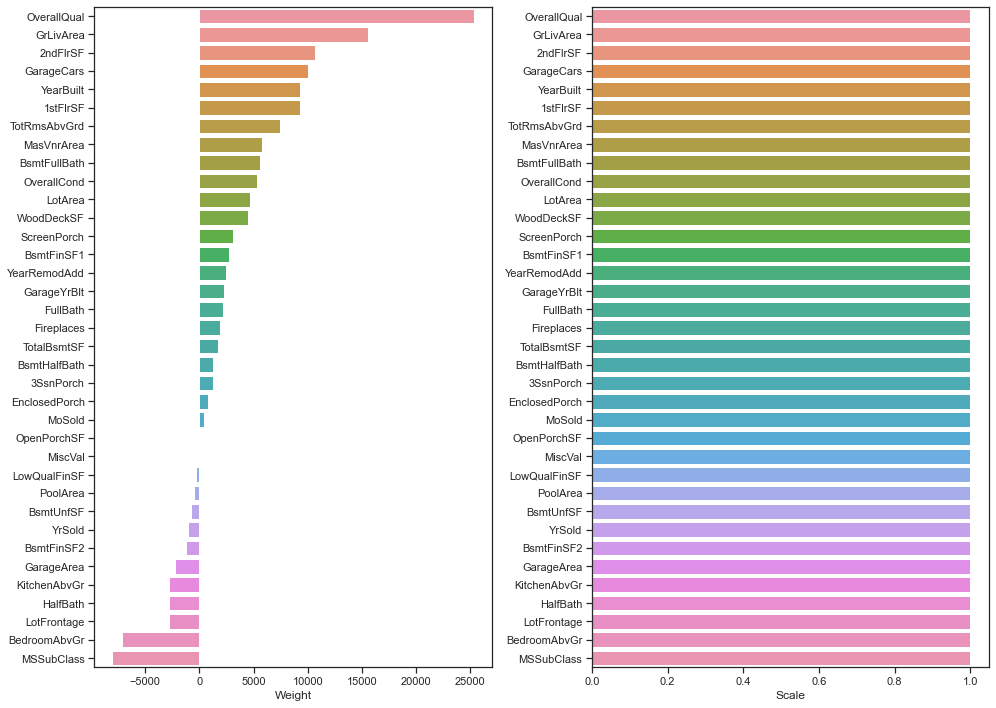

In [17]:
scales = pd.Series(data=X_train_scaled.std(axis=0), index=numeric_features)
show_weights(numeric_features, model.coef_, scales)

Best alpha = 297.6351


Text(0, 0.5, 'CV score')

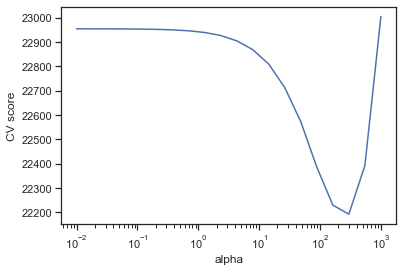

In [18]:
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-2, 3, 20)
searcher = GridSearchCV(Ridge(), [{"alpha": alphas}], scoring="neg_mean_absolute_error", cv=10)
searcher.fit(X_train_scaled, y_train)

best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

In [19]:
from sklearn.pipeline import Pipeline

simple_pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('regression', Ridge(best_alpha))
])

model = simple_pipeline.fit(X_train[numeric_features], y_train)
y_pred = model.predict(X_test[numeric_features])
print("Test MAE = %.4f" % mean_absolute_error(y_test, y_pred))

Test MAE = 21724.8574


#  Работаем с категориальными признаками

In [20]:
categorical = list(X_train.dtypes[X_train.dtypes == "object"].index)
X_train[categorical] = X_train[categorical].fillna("NotGiven")
X_test[categorical] = X_test[categorical].fillna("NotGiven")

In [21]:
X_train[categorical].sample(5)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
838,RL,Pave,NotGiven,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,Unf,TA,TA,Y,NotGiven,NotGiven,NotGiven,WD,Normal
927,RL,Pave,NotGiven,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Feedr,...,Attchd,RFn,TA,TA,Y,NotGiven,GdPrv,NotGiven,WD,Normal
416,RL,Pave,NotGiven,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,...,Attchd,Fin,TA,TA,Y,NotGiven,NotGiven,NotGiven,WD,Normal
614,RM,Pave,NotGiven,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,NotGiven,NotGiven,NotGiven,NotGiven,Y,NotGiven,NotGiven,NotGiven,WD,Normal
1165,RL,Pave,NotGiven,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,...,Attchd,RFn,TA,TA,Y,NotGiven,NotGiven,NotGiven,New,Partial


In [22]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test MAE = %.4f" % mean_absolute_error(y_test, y_pred))

Test MAE = 18595.3514


In [23]:
print("Size before OneHot:", X_train.shape)
print("Size after OneHot:", column_transformer.transform(X_train).shape)

Size before OneHot: (1022, 79)
Size after OneHot: (1022, 294)


In [24]:
from sklearn.linear_model import Lasso

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

lasso_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])

model = lasso_pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("MAE = %.4f" % mean_absolute_error(y_test, y_pred))

MAE = 18548.6656


C:\Users\kashu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5769644156.36145, tolerance: 663740509.6745821
  model = cd_fast.sparse_enet_coordinate_descent(


In [25]:
ridge_zeros = np.sum(pipeline.steps[-1][-1].coef_ == 0)
lasso_zeros = np.sum(lasso_pipeline.steps[-1][-1].coef_ == 0)
print("Zero weights in Ridge:", ridge_zeros)
print("Zero weights in Lasso:", lasso_zeros)

Zero weights in Ridge: 0
Zero weights in Lasso: 29


Best alpha = 263.6651


Text(0, 0.5, 'CV score')

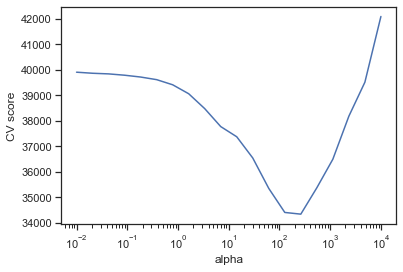

In [26]:
alphas = np.logspace(-2, 4, 20)
searcher = GridSearchCV(lasso_pipeline, [{"regression__alpha": alphas}],
                        scoring="neg_root_mean_squared_error", cv=10, n_jobs=-1)
searcher.fit(X_train, y_train)

best_alpha = searcher.best_params_["regression__alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

In [27]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(best_alpha))
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test MAE = %.4f" % mean_absolute_error(y_test, y_pred))

Test MAE = 17831.2821


In [28]:
lasso_zeros = np.sum(pipeline.steps[-1][-1].coef_ == 0)
print("Zero weights in Lasso:", lasso_zeros)

Zero weights in Lasso: 218


C:\Users\kashu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

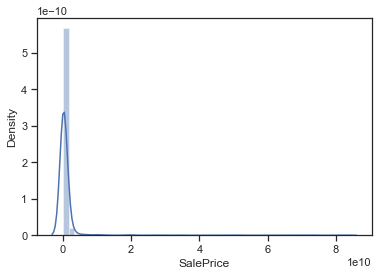

In [29]:
error = (y_train - model.predict(X_train)) ** 2
sns.distplot(error)

In [30]:
mask = (error < np.quantile(error, 0.95))

In [31]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(best_alpha))
])

model = pipeline.fit(X_train[mask], y_train[mask])
y_pred = model.predict(X_test)
print("Test MAE = %.4f" % mean_absolute_error(y_test, y_pred))

Test MAE = 16753.2500


In [32]:

y_train_pred2 = model.predict(X_train)
y_pred2 = model.predict(X_test)

print('Train r2 score: ', r2_score(y_train_pred2, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred2))
train_mse2 = mean_squared_error(y_train_pred2, y_train)
test_mse2 = mean_squared_error(y_pred2, y_test)
train_rmse2 = np.sqrt(train_mse2)
test_rmse2 = np.sqrt(test_mse2)
print('Train RMSE: %.4f' % train_rmse2)
print('Test RMSE: %.4f' % test_rmse2)

Train r2 score:  0.7901942028749629
Test r2 score:  0.8936264792596055
Train RMSE: 33390.0682
Test RMSE: 24963.5922


In [33]:
from sklearn.svm import SVR

In [34]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', MinMaxScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('svr', SVR(epsilon=0.2))
])

model_svr = pipeline.fit(X_train, y_train)
y_pred = model_svr.predict(X_test)
print("Test MAE = %.4f" % mean_absolute_error(y_test, y_pred))

Test MAE = 54642.3078


In [35]:

y_train_pred2 = model_svr.predict(X_train)
y_pred2 = model_svr.predict(X_test)

print('Train r2 score: ', r2_score(y_train_pred2, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred2))
train_mse2 = mean_squared_error(y_train_pred2, y_train)
test_mse2 = mean_squared_error(y_pred2, y_test)
train_rmse2 = np.sqrt(train_mse2)
test_rmse2 = np.sqrt(test_mse2)
print('Train RMSE: %.4f' % train_rmse2)
print('Test RMSE: %.4f' % test_rmse2)

Train r2 score:  -3496392.757073137
Test r2 score:  -0.033840294680755
Train RMSE: 82563.8536
Test RMSE: 77824.6256


In [36]:
X_train.shape

(1022, 79)

In [37]:
y_train.shape

(1022,)

In [72]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', MinMaxScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('tree', DecisionTreeRegressor(max_depth=3))
])
pipeline2 = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('tree', DecisionTreeRegressor(max_depth=10))
])

model_tree = pipeline.fit(X_train, y_train)
model_tree2 = pipeline2.fit(X_train, y_train)
y_1 = model_tree.predict(X_test)
y_2 = model_tree2.predict(X_test)

print("Test MAE = %.4f" % mean_absolute_error(y_test, y_1))
print("Test MAE = %.4f" % mean_absolute_error(y_test, y_2))

Test MAE = 31386.2572
Test MAE = 23983.0513


In [73]:
clf = DecisionTreeRegressor(max_depth=10)

pipeline.fit(X_train, y_train)

pipeline.predict(X_test)

array([164324.18930041, 189856.5       , 124802.07291667, 124802.07291667,
       271192.55833333, 271192.55833333, 271192.55833333, 124802.07291667,
       189856.5       , 189856.5       , 164324.18930041, 124802.07291667,
       271192.55833333, 164324.18930041, 189856.5       , 164324.18930041,
       367971.27906977, 124802.07291667, 271192.55833333, 189856.5       ,
       367971.27906977, 124802.07291667, 124802.07291667, 124802.07291667,
       164324.18930041, 124802.07291667, 164324.18930041, 124802.07291667,
       164324.18930041, 232328.56521739, 124802.07291667, 189856.5       ,
       124802.07291667, 164324.18930041, 124802.07291667, 124802.07291667,
       164324.18930041, 232328.56521739, 271192.55833333, 124802.07291667,
       271192.55833333, 124802.07291667, 124802.07291667, 232328.56521739,
       189856.5       , 232328.56521739, 232328.56521739, 124802.07291667,
       124802.07291667, 124802.07291667, 164324.18930041, 124802.07291667,
       164324.18930041, 1

In [98]:
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X_train, y_train)

In [99]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_276 <= 0.50
|   |--- feature_273 <= 0.02
|   |   |--- feature_264 <= 0.83
|   |   |   |--- feature_262 <= 0.43
|   |   |   |   |--- class: 80000
|   |   |   |--- feature_262 >  0.43
|   |   |   |   |--- feature_101 <= 0.50
|   |   |   |   |   |--- feature_106 <= 0.50
|   |   |   |   |   |   |--- feature_256 <= 0.50
|   |   |   |   |   |   |   |--- class: 92000
|   |   |   |   |   |   |--- feature_256 >  0.50
|   |   |   |   |   |   |   |--- feature_171 <= 0.50
|   |   |   |   |   |   |   |   |--- class: 75500
|   |   |   |   |   |   |   |--- feature_171 >  0.50
|   |   |   |   |   |   |   |   |--- class: 81000
|   |   |   |   |   |--- feature_106 >  0.50
|   |   |   |   |   |   |--- feature_266 <= 0.05
|   |   |   |   |   |   |   |--- feature_221 <= 0.50
|   |   |   |   |   |   |   |   |--- class: 86000
|   |   |   |   |   |   |   |--- feature_221 >  0.50
|   |   |   |   |   |   |   |   |--- class: 108000
|   |   |   |   |   |   |--- feature_266 >  0.05
|   |   |   |   |  

In [108]:
list(zip(data.columns.values, model.feature_importances_))

[('MSSubClass', 0.0),
 ('MSZoning', 0.0019635456793349305),
 ('LotFrontage', 0.0),
 ('LotArea', 0.003927091358669861),
 ('Street', 0.0029453185190023955),
 ('Alley', 0.0),
 ('LotShape', 0.0),
 ('LandContour', 0.0009817728396674652),
 ('Utilities', 0.0029453185190023955),
 ('LotConfig', 0.0019635456793349305),
 ('LandSlope', 0.009999207618552578),
 ('Neighborhood', 0.0019635456793349305),
 ('Condition1', 0.0),
 ('Condition2', 0.010472243623119628),
 ('BldgType', 0.0),
 ('HouseStyle', 0.0029453185190023955),
 ('OverallQual', 0.0019635456793349305),
 ('OverallCond', 0.0024544320991686627),
 ('YearBuilt', 0.0),
 ('YearRemodAdd', 0.0),
 ('RoofStyle', 0.007363296297505989),
 ('RoofMatl', 0.0),
 ('Exterior1st', 0.0019635456793349305),
 ('Exterior2nd', 0.0),
 ('MasVnrType', 0.005399750618171058),
 ('MasVnrArea', 0.002334707127441614),
 ('ExterQual', 0.0009817728396674652),
 ('ExterCond', 0.0009817728396674652),
 ('Foundation', 0.0009817728396674652),
 ('BsmtQual', 0.0009817728396674652),
 ('Bs

In [109]:
sum(model.feature_importances_)

0.9999999999999994